In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/clear_data.csv", header=0, index_col=0)

In [3]:
data

,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.471826,50,0,0.363909,12983.0,9,0,2,0,1.0
1,1,0.490075,26,0,0.548825,1105.0,4,0,0,0,0.0
2,0,0.064043,55,0,0.363049,4800.0,9,0,1,0,2.0
3,1,0.500567,49,1,0.348110,4443.0,6,1,0,2,2.0
4,0,0.000000,54,0,1021.000000,NaN,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.334523,46,1,0.434704,15000.0,7,0,1,1,4.0
4996,0,0.043365,39,0,0.361940,6000.0,6,0,1,0,0.0
4997,1,0.132348,41,0,0.303195,4600.0,7,0,0,0,1.0
4998,1,0.891435,47,0,2131.000000,NaN,17,0,2,0,0.0


(array([2.499e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.,  619., 1238., 1857., 2476., 3095., 3714., 4333., 4952.,
        5571., 6190.]),
 <a list of 10 Patch objects>)

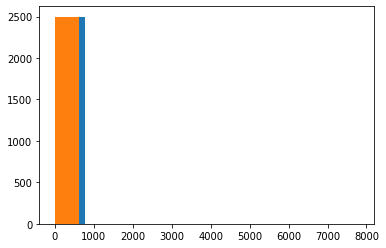

In [94]:
def plot_graphics(dataframe: pd.DataFrame, column_name: str, target_name: str = "target", quantile=1):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle(column_name)
    dataframe = dataframe[dataframe[column_name] < dataframe[column_name].quantile(quantile)]
    axs[0].hist(dataframe[dataframe["target"] == 0][column_name], label="Виплатити борг", color="green", alpha=0.5)
    axs[0].hist(dataframe[dataframe["target"] == 1][column_name], label="Збанкрутували", color="orange", alpha=0.5)
    axs[0].legend()
    
    axs[1].boxplot(dataframe[dataframe["target"] == 0][column_name])
    axs[1].set_title("Виплатити борг")

    axs[2].boxplot(dataframe[dataframe["target"] == 1][column_name])
    axs[2].set_title("Збанкрутували")
    plt.show()

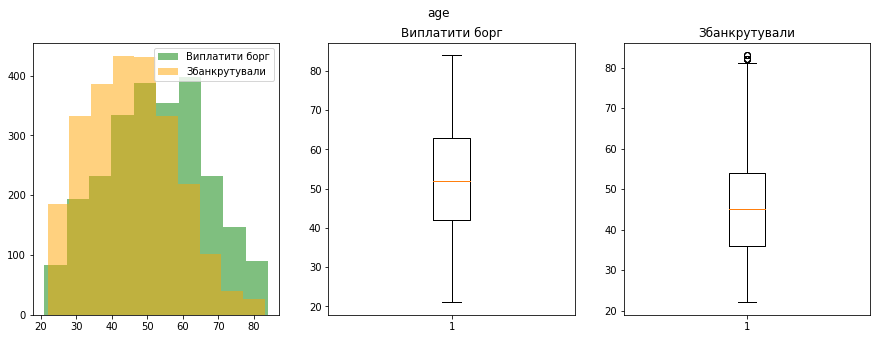

In [96]:
plot_graphics(data, "age", quantile=0.99)